# Income Spent Analysis Using Hierarchial Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datak.csv to datak.csv


In [ ]:
dataset = pd.read_csv("datak.csv")

# Summarize Dataset

In [ ]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


# Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset["Gender"] = label_encoder.fit_transform(dataset['Gender'])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Dendogram data Visualization

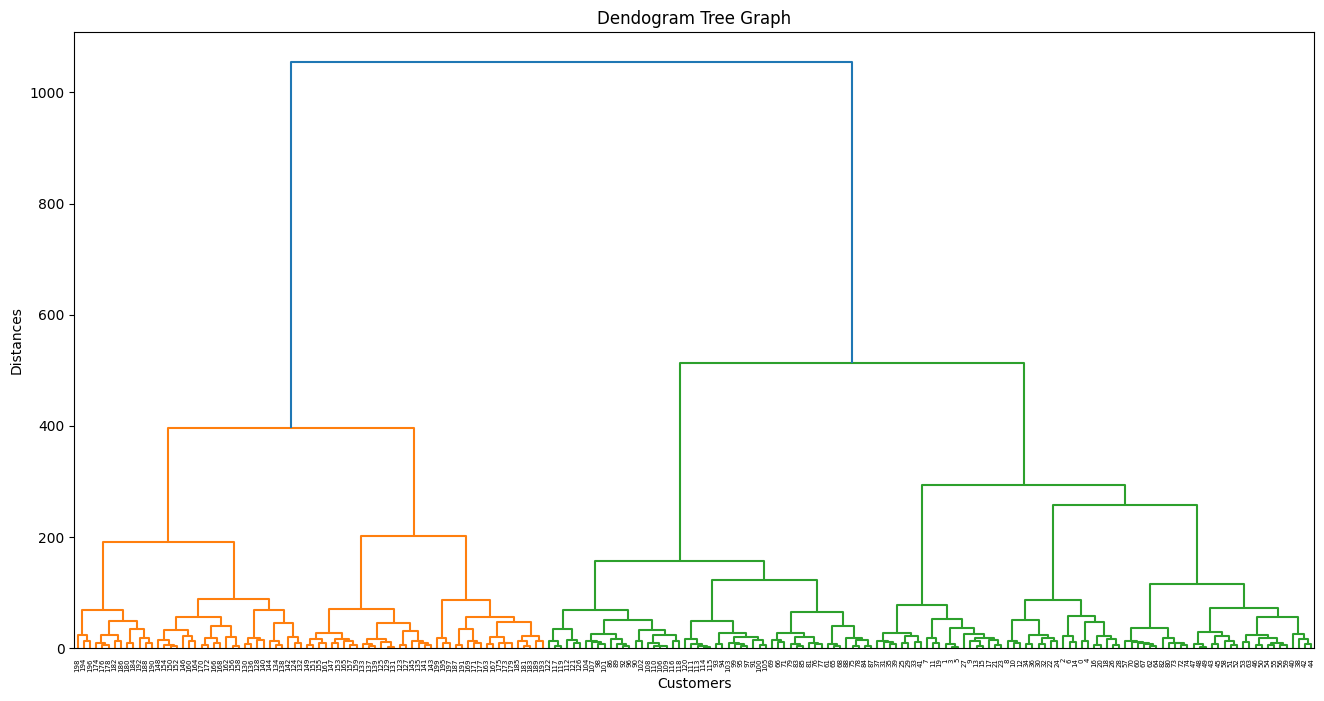

In [ ]:
import scipy.cluster.hierarchy as clus
plt.figure(1,figsize=(16,8))
dendrogram = clus.dendrogram(clus.linkage(dataset,method="ward"))
plt.title("Dendogram Tree Graph")
plt.xlabel("Customers")
plt.ylabel("Distances")
plt.show()

# Fitting Hierarchail Clustering to dataset with n=5

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")
y_means = model.fit_predict(dataset)
y_means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

# Visualizing the number of clusters
Cluster - 1 : Customers with medium income and Medium spend
Cluster - 2 : Customers with high income and high spend
Cluster - 3 : Customers with Low income and Low spend
Cluster - 4 : Customers with high income but Low spend
Cluster - 5 : Customers with Low income but High spend

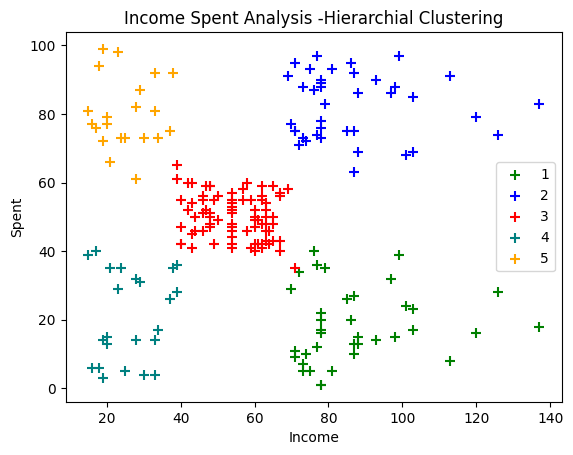

In [ ]:
X = dataset.iloc[:,[3,4]].values
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50,marker="+",c="green",label="1")
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50,marker="+",c="blue",label="2")
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50,marker="+",c="red",label="3")
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50,marker="+",c="teal",label="4")
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50,marker="+",c="orange",label="5")
plt.title("Income Spent Analysis -Hierarchial Clustering")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.legend()
plt.show()